# SYS 611: Event Queuing Model

Paul T. Grogan <pgrogan@stevens.edu>

This example constructs a simulation model for a single-server queuing system using the event-centric perspective.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [20]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np

# import the matplotlib.pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

## Process Generators

The two process generators that are required to model a simple queuing system are the inter-arrival (time between customer arrivals) and service duration. While not required for the general model, both are represented here as exponentially-distributed random variables.

In [5]:
_lambda = 1/1.5 # arrival rate, 1.5 minutes per customer or 2/3 customer per minute
_mu = 1/0.75 # service rate, 0.75 minutes per customer or 4/3 customer per minute

# define process generator for inter-arrival duration
def gen_t_arrival():
    r = np.random.rand()
    return -np.log(1-r)/_lambda
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_lambda)
    """

# define process generator for service duration
def gen_t_service():
    r = np.random.rand()
    return -np.log(1-r)/_mu
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_mu)
    """

## State Transition Function

The state transition function processes the model logic. This function computes updates to *all* simulation variables.

In [28]:
def _delta(t, N, t_A, t_D, N_A, N_D, W):
    # update the total waiting time
    W += N*(min(t_A, t_D) - t)
    # update the simulation time
    t = min(t_A, t_D)
    if t_A <= t_D:
        # this is an arrival - increment the state variable
        N += 1
        # record an arrival
        N_A += 1
        if N <= 1:
            # schedule the departure
            t_D = t + gen_t_service()
        # schedule another arrival as long as t < 1000 minutes
        t_A = t + gen_t_arrival() if t < 1000 else np.inf
    else:
        # this is a departure - decrement the state variable
        N -= 1
        # record a departure
        N_D += 1
        # schedule the next departure if there are more in the system
        t_D = t + gen_t_service() if N > 0 else np.inf
    return t, N, t_A, t_D, N_A, N_D, W

## Simulation

Generate a state trajectory for a specified number of state transitions.

         t       t_A       t_D         N       N_A       N_D         W
      0.00      3.13       inf         0         0         0      0.00
      3.13      4.71      5.30         1         1         0      0.00
      4.71      6.44      5.30         2         2         0      1.58
      5.30      6.44      5.57         1         2         1      2.77
      5.57      6.44       inf         0         2         2      3.03
      6.44      7.71      6.88         1         3         2      3.03
      6.88      7.71       inf         0         3         3      3.47
      7.71      8.12      7.86         1         4         3      3.47
      7.86      8.12       inf         0         4         4      3.62
      8.12      9.15      8.21         1         5         4      3.62
      8.21      9.15       inf         0         5         5      3.71
      9.15      9.90      9.95         1         6         5      3.71
      9.90     10.17      9.95         2         7         5      4.46
      

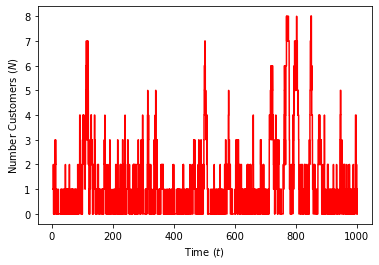

In [43]:
# initialize variables
t = 0 # simulation time
t_A = gen_t_arrival() # time of next customer arrival
t_D = np.inf # time of next customer departure
N = 0 # number of customers in the queuing system
N_A = 0 # cumulative number of arrivals
N_D = 0 # cumulative number of departures
W = 0 # cumulative waiting time

# initialize data lists for plotting
plot_t = [] # simulation time
plot_N = [] # number of customers in the queuing system

# flag to toggle table display
print_table = False

print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
        't', 't_A', 't_D', 'N', 'N_A', 'N_D', 'W'))
print('{:10.2f}{:10.2f}{:10.2f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}'.format(
        t, t_A, t_D, N, N_A, N_D, W))

# loop until simulation ends
while t_A < np.inf or t_D < np.inf:
    t, N, t_A, t_D, N_A, N_D, W = _delta(t, N, t_A, t_D, N_A, N_D, W)
    
    # append data for plotting
    plot_t.append(t)
    plot_N.append(N)
    
    if t < 10:
        # display current state for the first 10 minutes
        print('{:10.2f}{:10.2f}{:10.2f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}'.format(
                t, t_A, t_D, N, N_A, N_D, W))

# print key summary statistics
print('W_bar = {:.2f}'.format(W/N_A))

# plot the state trajectory
plt.figure()
plt.step(plot_t, plot_N, '-r', where='post')
plt.xlabel('Time ($t$)')
plt.ylabel('Number Customers ($N$)')
plt.show()